In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox
pd.options.display.max_rows = 100
## Install xlrd package to load Excel files
#!conda install openpyxl
#!conda install xlrd

In [2]:
tca_raw = pd.read_csv('clean_market_data.csv')

In [3]:
tca_raw

,unnamed: 0,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,...,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,2
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,A,2
10908,10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


In [4]:
tca_raw['month'] = tca_raw['effective to date'].dt.month


AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
tca_raw = tca_raw.drop('effective to date', axis = 1)

In [15]:
numerical = tca_raw.select_dtypes(include = np.number)

In [16]:
numerical_columns = numerical.columns.tolist()
print(numerical_columns)


['unnamed: 0', 'customer lifetime value', 'income', 'monthly premium auto', 'months since last claim', 'months since policy inception', 'number of open complaints', 'number of policies', 'total claim amount', 'month']


In [17]:
numerical

,unnamed: 0,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,month
0,0,4809.216960,48029,61,7.000000,52,0.0,9,292.800000,2
1,1,2228.525238,0,64,3.000000,26,0.0,1,744.924331,1
2,2,14947.917300,22139,100,34.000000,31,0.0,2,480.000000,2
3,3,22332.439460,49078,97,10.000000,3,0.0,2,484.013411,1
4,4,9025.067525,23675,117,15.149071,31,0.0,7,707.925645,1
...,...,...,...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,15.149071,40,0.0,7,1214.400000,1
10906,10906,5259.444853,61146,65,7.000000,68,0.0,6,273.018929,1
10907,10907,23893.304100,39837,201,11.000000,63,0.0,2,381.306996,2
10908,10908,11971.977650,64195,158,0.000000,27,4.0,6,618.288849,2


<Axes: xlabel='income', ylabel='total claim amount'>

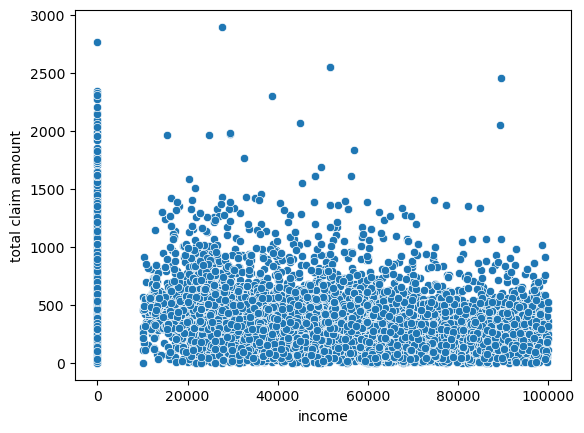

In [18]:
sns.scatterplot(x=numerical['income'],y=numerical['total claim amount'])

#scatterplot showing the relationship between income of customer and cost of the customer to the company (total claim amount)


<Axes: xlabel='income', ylabel='monthly premium auto'>

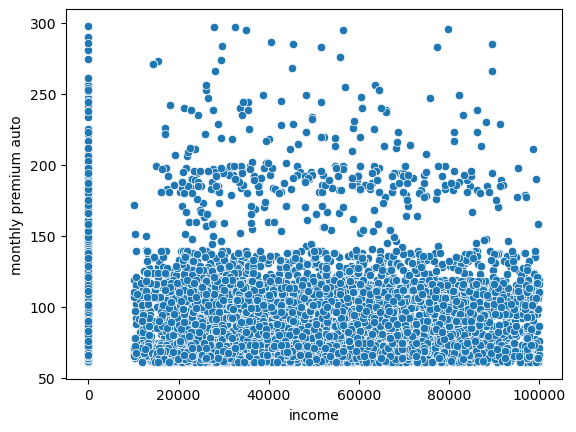

In [19]:
sns.scatterplot(x=numerical['income'],y=numerical['monthly premium auto'])

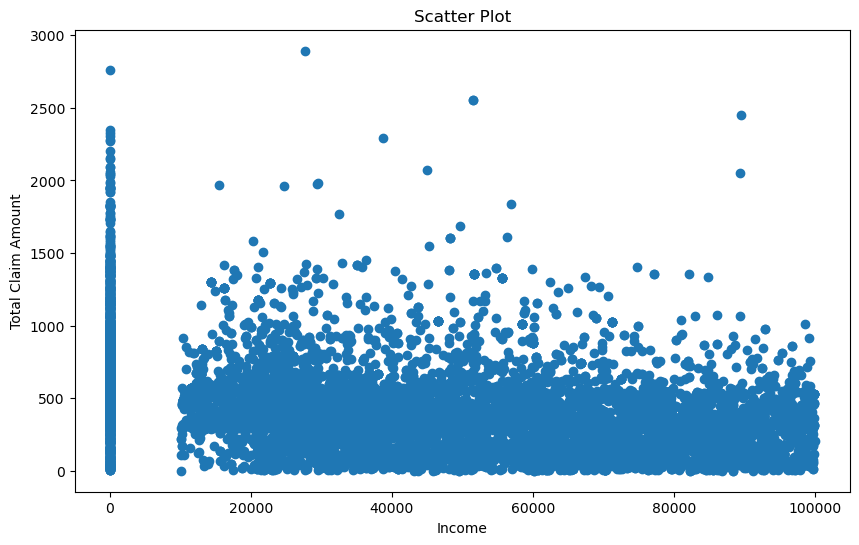

15

In [21]:
#attempting a hover scatterplot (unsuccessful)

import matplotlib.pyplot as plt
import mplcursors

# Create the scatter plot
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(numerical['income'], numerical['total claim amount'])

# Define the columns to include in the hover labels
columns_to_include = ['customer lifetime value', 'income', 'monthly premium auto', 
                      'months since last claim', 'months since policy inception', 
                      'number of open complaints', 'number of policies', 'total claim amount']

# Create the hover labels
labels = []
for i, row in numerical.iterrows():
    customer_info = '\n'.join([f"{column}: {row[column]}" for column in columns_to_include])
    labels.append(customer_info)

# Create the cursor object and configure it
cursor = mplcursors.cursor(scatter)
cursor.connect("add", lambda sel: sel.annotation.set_text(labels[sel.target.index]))

# Show the plot
plt.xlabel('Income')
plt.ylabel('Total Claim Amount')
plt.title('Scatter Plot')
plt.show()


from matplotlib.offsetbox import AnchoredText

def on_hover(event):
    if event.inaxes == ax:
        cont, ind = scatter.contains(event)
        if cont:
            index = ind['ind'][0]
            x = numerical['income'].iloc[index]
            y = numerical['total claim amount'].iloc[index]
            customer_info = '\n'.join([f"{column}: {numerical[column].iloc[index]}" for column in columns_to_include])

            # Clear any existing annotations
            if hasattr(ax, 'annotations'):
                for annotation in ax.annotations:
                    annotation.remove()

            # Create the anchored text box
            text_box = AnchoredText(customer_info, loc='upper left', frameon=True)
            ax.add_artist(text_box)

            # Position the text box near the cursor
            text_box.set_position((x, y))

            # Update the plot
            fig.canvas.draw()

# Connect the hover event to the figure
fig.canvas.mpl_connect('motion_notify_event', on_hover)


In [22]:
sns.displot.numerical['total claim amount'])


SyntaxError: unmatched ')' (1965745610.py, line 1)

In [ ]:
sns.boxplot(x="customer lifetime value",data=numerical)

<Axes: >

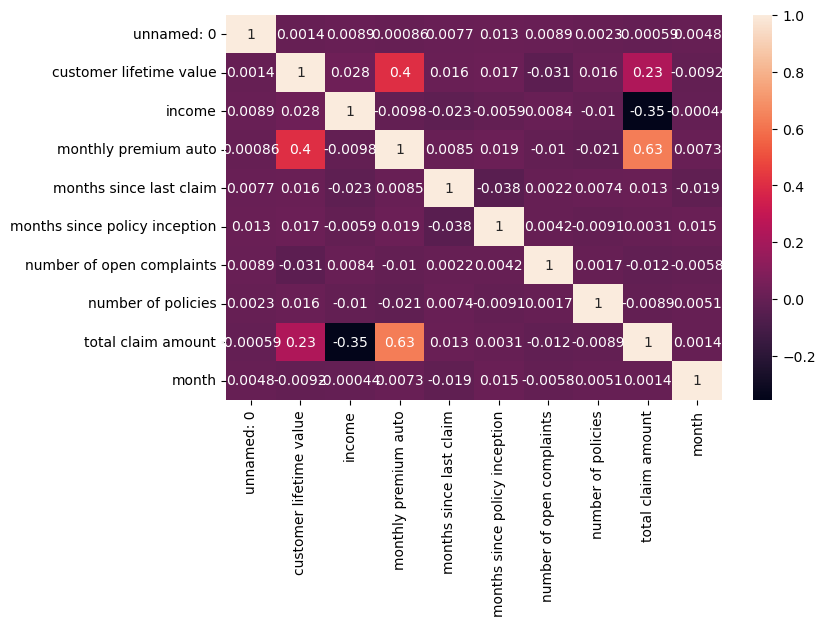

In [23]:
fig=plt.figure(figsize=(8,5))
sns.heatmap(numerical.corr(),annot=True)

<Figure size 2000x4000 with 0 Axes>

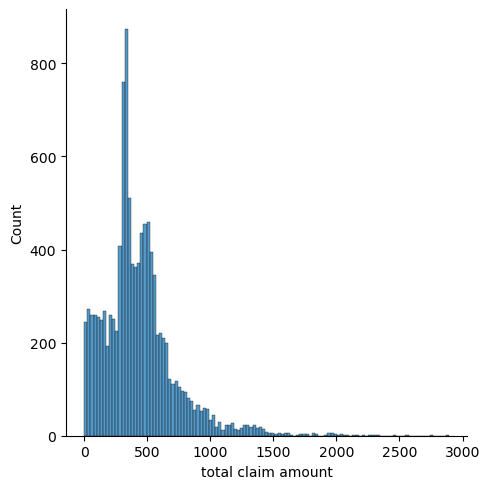

In [24]:
plt.figure(figsize=(20, 40))
sns.displot(numerical['total claim amount'])
plt.show()


In [25]:
categorical = tca_raw.select_dtypes(include = object)

In [26]:
categorical

,customer,state,response,coverage,education,effective to date,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,vehicle type
0,DK49336,Arizona,No,Basic,College,2011-02-18,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,2011-01-18,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2011-02-10,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,2011-01-11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,2011-01-17,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,2011-01-19,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,2011-01-06,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2011-02-06,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,A
10908,WA60547,California,No,Premium,College,2011-02-13,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


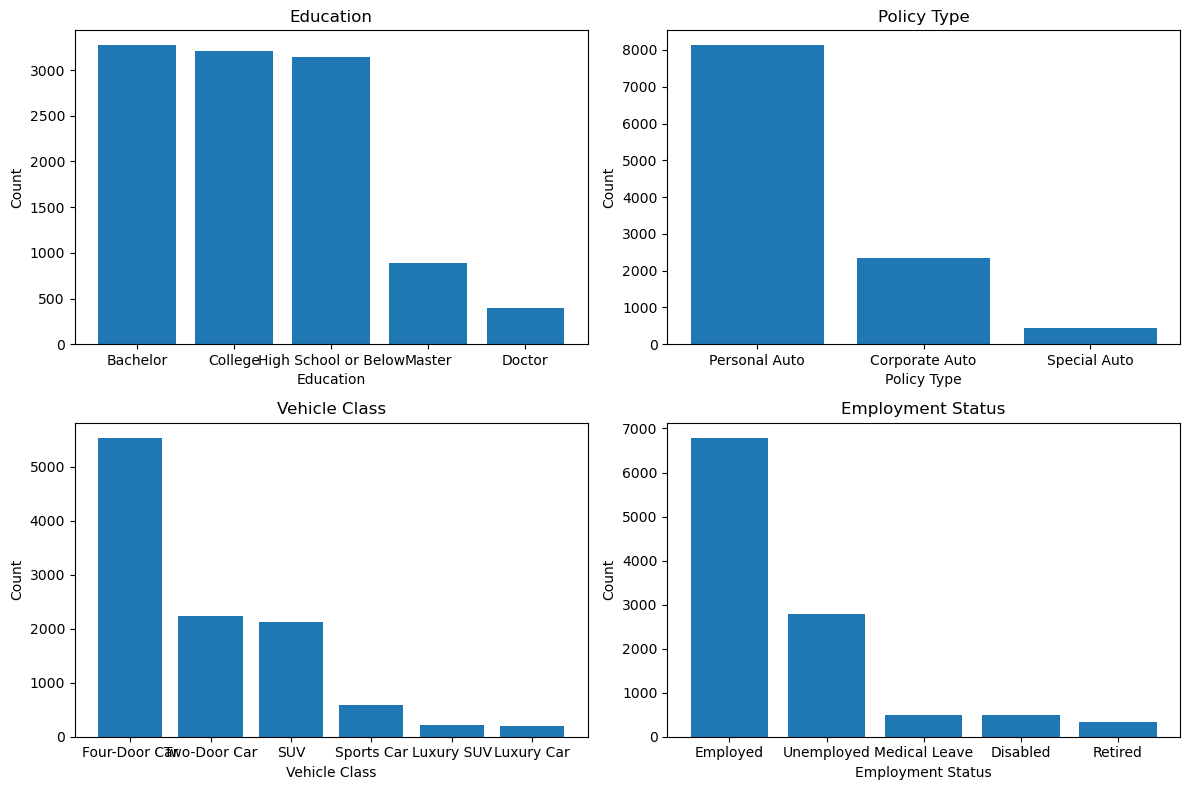

In [27]:
education_counts = categorical['education'].value_counts()
policy_type_counts = categorical['policy type'].value_counts()
vehicle_class_counts = categorical['vehicle class'].value_counts()
employmentstatus_counts = categorical['employmentstatus'].value_counts()

# Create a figure and axes for subplots
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

# Flatten the axes array
ax = ax.flatten()

# Plotting histogram for 'education'
ax[0].bar(education_counts.index, education_counts.values)
ax[0].set_title('Education')
ax[0].set_xlabel('Education')
ax[0].set_ylabel('Count')

# Plotting histogram for 'policy_type'
ax[1].bar(policy_type_counts.index, policy_type_counts.values)
ax[1].set_title('Policy Type')
ax[1].set_xlabel('Policy Type')
ax[1].set_ylabel('Count')

# Plotting histogram for 'vehicle_class'
ax[2].bar(vehicle_class_counts.index, vehicle_class_counts.values)
ax[2].set_title('Vehicle Class')
ax[2].set_xlabel('Vehicle Class')
ax[2].set_ylabel('Count')

# Plotting histogram for 'employmentstatus'
ax[3].bar(employmentstatus_counts.index, employmentstatus_counts.values)
ax[3].set_title('Employment Status')
ax[3].set_xlabel('Employment Status')
ax[3].set_ylabel('Count')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [28]:
pip install mplcursors


Note: you may need to restart the kernel to use updated packages.


In [36]:
#response_plot = sns.catplot(x='response', y='count', data=categorical, kind='bar', palette=palette_blind)


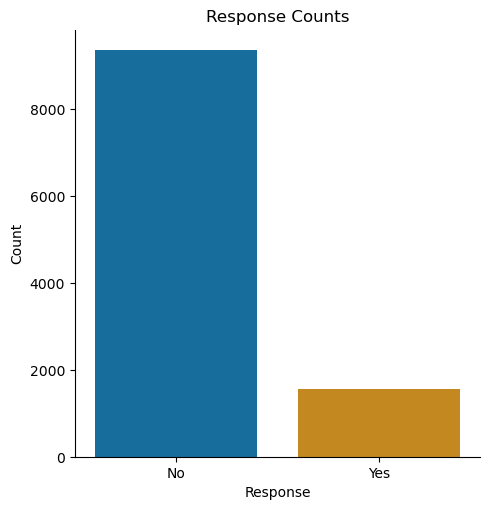

In [35]:
response_counts = categorical['response'].value_counts()

response_plot = sns.catplot(x='response', data=categorical, kind='count', palette='colorblind')
response_plot.set(title='Response Counts', xlabel='Response', ylabel='Count')
response_plot.set_xticklabels(['No', 'Yes'])


In [32]:
palette_blind = "colorblind"

Text(0, 0.5, 'Count')

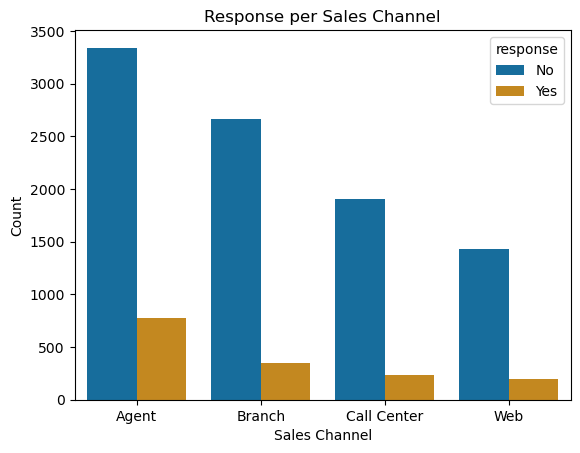

In [45]:
response_per_channel = categorical.groupby(['sales channel', 'response']).size().reset_index(name='count')

response_plot = sns.barplot(x='sales channel', y='count', hue='response', data=response_per_channel, palette=palette_blind)
response_plot.set_title('Response per Sales Channel')
response_plot.set_xlabel('Sales Channel')
response_plot.set_ylabel('Count')


In [ ]:
response_per_claim = tca_raw.groupby(['total claim amount', 'response']).size().reset_index(name='count')

response_plot = sns.barplot(x='total claim amount', y='count', hue='response', data=response_per_claim, palette=palette_blind)
response_plot.set_title('Response per Claim Amount')
response_plot.set_ylabel('Count')

